#### Package Requirements
```
pip install coiled "dask[complete]"
pip install earthaccess xarray matplotlib scipy h5netcdf
```

In [29]:
## Version numbers listed next to each package:

# Data location and access packages:
import earthaccess                                 # 0.6.1

# Analysis packages:
import xarray as xr                                # 2023.9.0
import numpy as np                                 # 1.26.0

# Visualization packages:
import matplotlib.pyplot as plt                    # 3.8.0

# Cloud computing / dask packages:
import coiled

%matplotlib inline

In [30]:
xr.set_options( # display options for xarray objects
    display_expand_attrs=False,
    display_expand_coords=True,
    display_expand_data=True,
)

# Earthdata Login and locate MUR file access endpoints for first decade of record

In [31]:
earthaccess.login() # Login with your credentials

In [32]:
datainfo = earthaccess.search_data(
    short_name="MUR-JPL-L4-GLOB-v4.1",
    cloud_hosted=True,
    temporal=("2002-01-01", "2013-05-01"),
    )

Granules found: 3988


In [33]:
datainfo[0]

Collection: {'Version': '4.1', 'ShortName': 'MUR-JPL-L4-GLOB-v4.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2002-06-01T21:00:00.000Z', 'BeginningDateTime': '2002-05-31T21:00:00.000Z'}}
Size(MB): 332.3598403930664
Data: ['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20020601090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc']

# Inspect a file

In [34]:
## Open a file:
fileobj_test = earthaccess.open([datainfo[0]])[0] # Generate file objects from the endpoints which are compatible with Xarray
sst_test = xr.open_dataset(fileobj_test)['analysed_sst']

Opening 1 granules, approx size: 0.32 GB
using endpoint: https://archive.podaac.earthdata.nasa.gov/s3credentials


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
## Define some geolocations for the analysis:

# Region to perform analysis over:
lat_region = (30, 45)
lon_region = (-135, -105)

# Points to plot seasonal cycle at:
lat_points = (38, 38, 38, 38)
lon_points = (-123.25, -125, -128, -132)

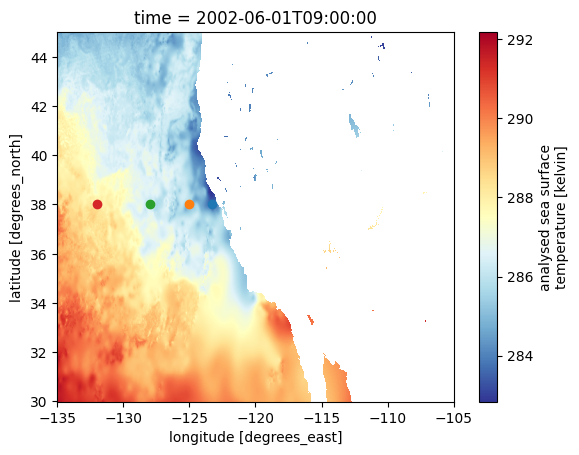

In [36]:
## Plot SST in analysis region and mark 4 points for seasonal cycle:
fig = plt.figure()
sst_test.sel(lat=slice(*lat_region), lon=slice(*lon_region)).plot(cmap='RdYlBu_r')

for lat, lon in zip(lat_points, lon_points):
    plt.scatter(lon, lat)

# Compute mean seasonal cycle for a decade of data at weekly temporal resolution

In [37]:
## Thin out data files to get weekly temporal resolution for this demo:
datainfo_thinned = [datainfo[i] for i in range(len(datainfo)) if i%7==0]

In [38]:
## Confirm we have about a decade of files and at weekly resolution:
print("First and last file times \n--------------------------")
print(datainfo_thinned[0]['umm']['TemporalExtent']['RangeDateTime']['BeginningDateTime'])
print(datainfo_thinned[-1]['umm']['TemporalExtent']['RangeDateTime']['BeginningDateTime'])
print("\nFirst and second file times \n--------------------------")
print(datainfo_thinned[0]['umm']['TemporalExtent']['RangeDateTime']['BeginningDateTime'])
print(datainfo_thinned[1]['umm']['TemporalExtent']['RangeDateTime']['BeginningDateTime'])

First and last file times 
--------------------------
2002-05-31T21:00:00.000Z
2013-04-26T21:00:00.000Z

First and second file times 
--------------------------
2002-05-31T21:00:00.000Z
2002-06-07T21:00:00.000Z


In [39]:
cluster = coiled.Cluster(
    n_workers=25, 
    account="podaac-science", 
    region="us-west-2", 
    worker_vm_types="c7g.large", # or can try "m7a.medium"
    scheduler_vm_types="c7g.large" # or can try "m7a.medium"
    #name=''
    ) 
client = cluster.get_client()

Output()

╭────────────────────────────────────────── Package Info ──────────────────────────────────────────╮
│                                ╷                                                                 │
│   Package                      │ Note                                                            │
│ ╶──────────────────────────────┼───────────────────────────────────────────────────────────────╴ │
│   Babel                        │ https://pypi.org/pypi                                           │
│   Cartopy                      │ https://pypi.org/pypi                                           │
│   Deprecated                   │ https://pypi.org/pypi                                           │
│   Jinja2                       │ https://pypi.org/pypi                                           │
│   MarkupSafe                   │ https://pypi.org/pypi                                           │
│   Pillow                       │ https://pypi.org/pypi                                           │
│   PyNaCl                       │ https://pypi.org/pypi                                           │
│   PyYAML                       │ https://pypi.org/pypi                                           │
│   Pygments                     │ https://pypi.org/pypi                                           │
│   Send2Trash                   │ https://pypi.org/pypi                                           │
│   aiobotocore                  │ https://pypi.org/pypi                                           │
│   aiohttp                      │ https://pypi.org/pypi                                           │
│   aioitertools                 │ https://pypi.org/pypi                                           │
│   aiosignal                    │ https://pypi.org/pypi                                           │
│   anyio                        │ https://pypi.org/pypi                                           │
│   argon2-cffi                  │ https://pypi.org/pypi                                           │
│   argon2-cffi-bindings         │ https://pypi.org/pypi                                           │
│   arrow                        │ https://pypi.org/pypi                                           │
│   asttokens                    │ https://pypi.org/pypi                                           │
│   async-lru                    │ https://pypi.org/pypi                                           │
│   async-timeout                │ https://pypi.org/pypi                                           │
│   attrs                        │ https://pypi.org/pypi                                           │
│   backcall                     │ https://pypi.org/pypi                                           │
│   backoff                      │ https://pypi.org/pypi                                           │
│   bcrypt                       │ https://pypi.org/pypi                                           │
│   beautifulsoup4               │ https://pypi.org/pypi                                           │
│   bleach                       │ https://pypi.org/pypi                                           │
│   bokeh                        │ https://pypi.org/pypi                                           │
│   boto3                        │ https://pypi.org/pypi                                           │
│   botocore                     │ https://pypi.org/pypi                                           │
│   bounded-pool-executor        │ https://pypi.org/pypi                                           │
│   certifi                      │ https://pypi.org/pypi                                           │
│   cffi                         │ https://pypi.org/pypi                                           │
│   cftime                       │ https://pypi.org/pypi                                           │
│   charset-normalizer           │ https://pypi.org/pypi                                           │
│   click                        │ https://pypi.org/pypi     

Output()

In [40]:
%%time
fileobjs = earthaccess.open(datainfo_thinned) # Generate file objects from the endpoints which are compatible with Xarray

Opening 570 granules, approx size: 190.08 GB
using endpoint: https://archive.podaac.earthdata.nasa.gov/s3credentials


QUEUEING TASKS | :   0%|          | 0/570 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/570 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/570 [00:00<?, ?it/s]

CPU times: user 799 ms, sys: 56 ms, total: 855 ms
Wall time: 1.21 s


In [41]:
%%time

## Load files and rechunk SST data:
murdata = xr.open_mfdataset(fileobjs, parallel=True, chunks={'lat': 6000, 'lon': 6000, 'time': 1})
sst = murdata["analysed_sst"]
sst = sst.chunk(chunks={'lat': 500, 'lon': 500, 'time': 200})
sst

CPU times: user 7.53 s, sys: 246 ms, total: 7.78 s
Wall time: 49.1 s


<xarray.DataArray 'analysed_sst' (time: 570, lat: 17999, lon: 36000)>
dask.array<rechunk-merge, shape=(570, 17999, 36000), dtype=float32, chunksize=(200, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2013-04-27T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes: (7)

In [42]:
## ----------------
## Set up analysis
## ----------------
## (Since we're dealing with dask arrays, these functions calls don't do the computations yet, just set them up)

## Subset to region off U.S.A. west coast:
sst_regional = sst.sel(lat=slice(*lat_region), lon=slice(*lon_region))

## Remove linear warming trend:
p = sst_regional.polyfit(dim='time', deg=1) # Degree 1 polynomial fit coefficients over time for each lat, lon.
fit = xr.polyval(sst_regional['time'], p.polyfit_coefficients) # Compute linear trend time series at each lat, lon.
sst_detrend = (sst_regional - fit) # xarray is smart enough to subtract along the time dim only.

## Mean seasonal cycle:
seasonal_cycle = sst_detrend.groupby("time.month").mean("time")

/opt/coiled/env/lib/python3.11/site-packages/xarray/core/dataset.py:5117: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  stacked_var = exp_var.stack(**{new_dim: dims})


In [43]:
%%time
## ----------------
## Compute it all!!
## ----------------
seasonal_cycle = seasonal_cycle.compute()
cluster.scale(1)

/opt/coiled/env/lib/python3.11/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 32.04 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


CPU times: user 3.1 s, sys: 440 ms, total: 3.54 s
Wall time: 2min 46s


In [24]:
client.shutdown()
cluster.shutdown()

# Plot results

Text(0, 0.5, '$\\Delta$T (K)')

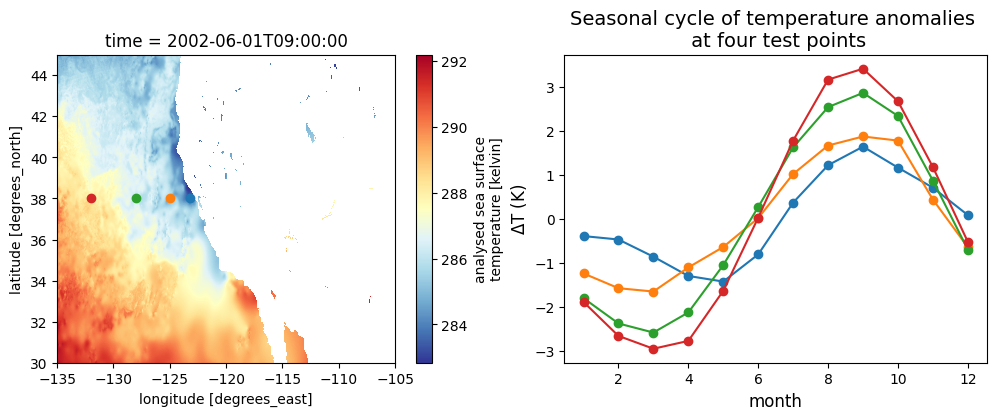

In [44]:
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 4))

## Replot the map and points from the test file:
sst_test.sel(lat=slice(*lat_region), lon=slice(*lon_region)).plot(ax=axes2[0], cmap='RdYlBu_r')
for lat, lon in zip(lat_points, lon_points):
    axes2[0].scatter(lon, lat)

## Seasonal cycles on another plot
for lat, lon in zip(lat_points, lon_points):
    scycle_point = seasonal_cycle.sel(lat=lat, lon=lon)
    axes2[1].plot(scycle_point['month'], scycle_point.values, 'o-')

axes2[1].set_title("Seasonal cycle of temperature anomalies \n at four test points", fontsize=14)
axes2[1].set_xlabel("month", fontsize=12)
axes2[1].set_ylabel(r"$\Delta$T (K)", fontsize=12)